# Tampak Depan Menggunakan YoloV8s-cls

## Mengimport Modul Dan Menampilkan Data

These lines of code are importing four different Python libraries/modules:

In [1]:
import os
import random
import shutil
import matplotlib.pyplot as plt

The code snippet you provided is setting up some directory paths and a split ratio for a dataset.


In [2]:
base_dir = 'D:/MODELING ML/DatasetV3_TampakAtas'
output_dir = 'D:/MODELING ML/YoloDatasetV3_TampakAtas'
split_ratio = 0.7 

This code snippet is creating directories for organizing image and label data into training and validation sets. It uses the `os.makedirs` function to create the necessary directory structure. Here's a breakdown:


In [3]:
# Create directories
os.makedirs(os.path.join(output_dir, 'images', 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'images', 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'labels', 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'labels', 'val'), exist_ok=True)

categories = os.listdir(base_dir)
number_label = {category: len(os.listdir(os.path.join(base_dir, category))) for category in categories}
total_files = sum(number_label.values())


This code snippet is splitting and copying image files into training and validation sets for each category. Here's a breakdown of what it does:


In [4]:
# Splitting and copying files
for category in categories:
    category_path = os.path.join(base_dir, category)
    images = os.listdir(category_path)
    random.shuffle(images)
    
    split_idx = int(len(images) * split_ratio)
    train_images = images[:split_idx]
    val_images = images[split_idx:]
    
    for img in train_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(output_dir, 'images', 'train', img))
        # Create corresponding empty label file (you need to generate actual label data)
        open(os.path.join(output_dir, 'labels', 'train', img.replace('.jpg', '.txt')), 'w').close()
    
    for img in val_images:
        shutil.copy(os.path.join(category_path, img), os.path.join(output_dir, 'images', 'val', img))
        # Create corresponding empty label file (you need to generate actual label data)
        open(os.path.join(output_dir, 'labels', 'val', img.replace('.jpg', '.txt')), 'w').close()

print(f"Total Files: {total_files}")


Total Files: 2022


This code snippet is defining folder paths for a dataset. It starts by setting the `base_dir` variable to the directory path 'D:\MODELING ML\DatasetV3_TampakAtas'. Then, it creates a dictionary `folder_paths` where keys represent different categories of images related to dental health (e.g., 'Perubahan Warna Gigi', 'Radang Gusi') and values are the full paths to the corresponding folders within the `base_dir`.

In [5]:
# Define the folder paths for the dataset
base_dir = 'D:\MODELING ML\DatasetV3_TampakAtas'
folder_paths = {
    'Perubahan Warna Gigi': os.path.join(base_dir, 'Perubahan Warna Gigi'),
    'Radang Gusi': os.path.join(base_dir, 'Radang Gusi'),
    'Gigi Berlubang': os.path.join(base_dir, 'Gigi Berlubang'),
    'Gigi Sehat': os.path.join(base_dir, 'Gigi Sehat'),
    'Bukan Gigi': os.path.join(base_dir, 'Bukan Gigi')
}

This code snippet is creating a directory structure for organizing datasets for a machine learning project using YOLO (You Only Look Once) object detection.


In [6]:
base_dataset_dir = 'D:\MODELING ML\YoloDatasetV3_TampakAtas'
os.makedirs(base_dataset_dir, exist_ok=True)

# Create subdirectories for training, validation, and test sets
train_dir = os.path.join(base_dataset_dir, 'train')
val_dir = os.path.join(base_dataset_dir, 'val')
test_dir = os.path.join(base_dataset_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

This code defines a function `split_and_copy_images` that takes in several parameters including `folder_paths` (a dictionary mapping labels to folder paths containing images), `train_dir`, `val_dir`, and `test_dir` (directories to store training, validation, and test images respectively), `val_size` (proportion of data to allocate for validation set, default is 0.2), and `test_size` (proportion of data to allocate for test set, default is 0.1).


In [7]:
def split_and_copy_images(folder_paths, train_dir, val_dir, test_dir, val_size=0.2, test_size=0.1):
    from sklearn.model_selection import train_test_split
    import shutil

    for label, folder_path in folder_paths.items():
        image_files = os.listdir(folder_path)
        train_files, temp_files = train_test_split(image_files, test_size=(val_size + test_size), random_state=42)
        val_files, test_files = train_test_split(temp_files, test_size=test_size/(val_size + test_size), random_state=42)

        # Create label directories in train, val, and test folders
        train_label_dir = os.path.join(train_dir, label)
        val_label_dir = os.path.join(val_dir, label)
        test_label_dir = os.path.join(test_dir, label)
        os.makedirs(train_label_dir, exist_ok=True)
        os.makedirs(val_label_dir, exist_ok=True)
        os.makedirs(test_label_dir, exist_ok=True)

        # Copy train images
        for image_file in train_files:
            shutil.copy2(os.path.join(folder_path, image_file), os.path.join(train_label_dir, image_file))

        # Copy val images
        for image_file in val_files:
            shutil.copy2(os.path.join(folder_path, image_file), os.path.join(val_label_dir, image_file))

        # Copy test images
        for image_file in test_files:
            shutil.copy2(os.path.join(folder_path, image_file), os.path.join(test_label_dir, image_file))

# Split data and create dataset
split_and_copy_images(folder_paths, train_dir, val_dir, test_dir)

print("Dataset split into training, validation, and test sets successfully!")

Dataset split into training, validation, and test sets successfully!


This code defines a function `display_sample_images` that takes a base directory path and an optional number of samples as input. It then displays sample images with labels from the specified directory. The function reads images using OpenCV, converts them to RGB format, and displays them using matplotlib. The function creates subplots for each label and displays a specified number of sample images for each label.


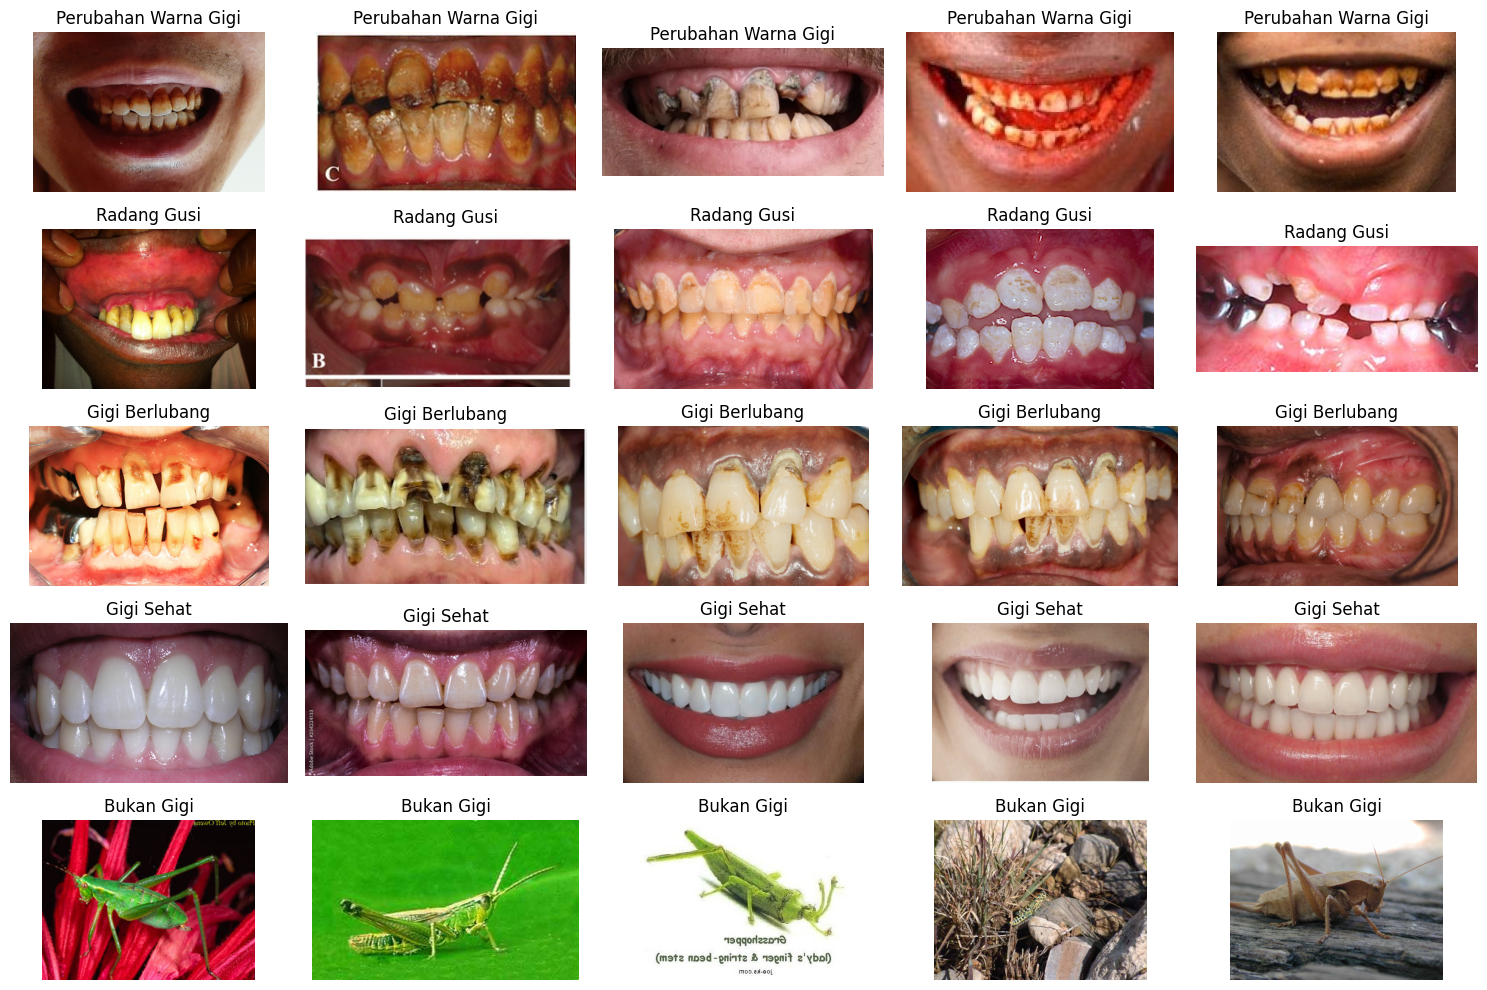

In [8]:
# Function to display sample images with labels
import cv2

def display_sample_images(base_dir, num_samples=5):
    fig, axes = plt.subplots(len(folder_paths), num_samples, figsize=(15, 10))
    for i, (label, folder_path) in enumerate(folder_paths.items()):
        image_files = os.listdir(os.path.join(base_dir, label))
        sampled_images = image_files[:num_samples]
        for j, image_file in enumerate(sampled_images):
            image_path = os.path.join(base_dir, label, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            axes[i, j].imshow(image)
            axes[i, j].set_title(label)
            axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images with labels
display_sample_images(base_dir)

## Modeling And Result

This code snippet is importing the YOLO model from the Ultralytics library, creating an instance of the YOLO model with a specified model version ('yolov8s-cls.pt'), and then training the model using the specified dataset directory, number of epochs, and image size.


In [9]:
# import YOLO model
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8s-cls.yaml")  # build a new model from YAML
model = YOLO("yolov8s-cls.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolov8s-cls.yaml").load("yolov8s-cls.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data=base_dataset_dir, epochs=50, imgsz=416)

YOLOv8s-cls summary: 99 layers, 6361736 parameters, 6361736 gradients, 13.6 GFLOPs
YOLOv8s-cls summary: 99 layers, 6361736 parameters, 6361736 gradients, 13.6 GFLOPs
Transferred 158/158 items from pretrained weights
Ultralytics YOLOv8.2.26  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 9 5950X 16-Core Processor)
engine\trainer: task=classify, mode=train, model=yolov8s-cls.yaml, data=D:\MODELING ML\YoloDatasetV3_TampakAtas, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train31, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_

train: Scanning D:\MODELING ML\YoloDatasetV3_TampakAtas\train... 2993 images, 0 corrupt: 100%|██████████| 2993/2993 [00:01<00:00, 2908.84it/s]

train: WARNING  D:\MODELING ML\YoloDatasetV3_TampakAtas\train\Radang Gusi\00000225.jpg: corrupt JPEG restored and saved
train: WARNING  D:\MODELING ML\YoloDatasetV3_TampakAtas\train\Radang Gusi\Image_55 (4).jpg: corrupt JPEG restored and saved


train: New cache created: D:\MODELING ML\YoloDatasetV3_TampakAtas\train.cache


val: Scanning D:\MODELING ML\YoloDatasetV3_TampakAtas\val... 1125 images, 0 corrupt: 100%|██████████| 1125/1125 [00:00<?, ?it/s]

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)


TensorBoard: model graph visualization added 
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\classify\train31
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:48<00:00,  4.69s/it]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:35<00:00,  4.31s/it]

                   all      0.883          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:24<00:00,  4.00s/it]

                   all      0.876          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:12<00:00,  3.69s/it]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:22<00:00,  3.97s/it]

                   all      0.931          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.94s/it]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:23<00:00,  3.98s/it]

                   all      0.952          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:22<00:00,  3.95s/it]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:23<00:00,  3.98s/it]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50         0G     0.1625          1        416: 100%|██████████| 188/188 [17:43<00:00,  5.66s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:22<00:00,  3.97s/it]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50         0G     0.1371          1        416: 100%|██████████| 188/188 [17:43<00:00,  5.66s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:22<00:00,  3.96s/it]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50         0G     0.1582          1        416: 100%|██████████| 188/188 [17:37<00:00,  5.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:23<00:00,  3.97s/it]

                   all      0.975          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50         0G     0.1271          1        416: 100%|██████████| 188/188 [17:42<00:00,  5.65s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:22<00:00,  3.97s/it]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50         0G     0.1164          1        416: 100%|██████████| 188/188 [17:42<00:00,  5.65s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:22<00:00,  3.97s/it]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50         0G    0.09861          1        416: 100%|██████████| 188/188 [17:40<00:00,  5.64s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.94s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50         0G    0.09201          1        416: 100%|██████████| 188/188 [17:35<00:00,  5.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:22<00:00,  3.96s/it]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50         0G     0.1053          1        416: 100%|██████████| 188/188 [17:34<00:00,  5.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:22<00:00,  3.95s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50         0G    0.08032          1        416: 100%|██████████| 188/188 [17:35<00:00,  5.61s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:22<00:00,  3.95s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50         0G      0.089          1        416: 100%|██████████| 188/188 [17:28<00:00,  5.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:20<00:00,  3.91s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50         0G    0.08864          1        416: 100%|██████████| 188/188 [17:22<00:00,  5.55s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.92s/it]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50         0G    0.08228          1        416: 100%|██████████| 188/188 [17:25<00:00,  5.56s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:20<00:00,  3.91s/it]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50         0G    0.07359          1        416: 100%|██████████| 188/188 [17:23<00:00,  5.55s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:20<00:00,  3.90s/it]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50         0G    0.07815          1        416: 100%|██████████| 188/188 [17:21<00:00,  5.54s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:20<00:00,  3.90s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50         0G    0.08397          1        416: 100%|██████████| 188/188 [17:23<00:00,  5.55s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.92s/it]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50         0G    0.07322          1        416: 100%|██████████| 188/188 [17:24<00:00,  5.56s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.94s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50         0G    0.07478          1        416: 100%|██████████| 188/188 [17:27<00:00,  5.57s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:20<00:00,  3.91s/it]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50         0G    0.06419          1        416: 100%|██████████| 188/188 [17:28<00:00,  5.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:18<00:00,  3.85s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50         0G    0.05114          1        416: 100%|██████████| 188/188 [17:08<00:00,  5.47s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:23<00:00,  3.99s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50         0G     0.0644          1        416: 100%|██████████| 188/188 [17:39<00:00,  5.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:22<00:00,  3.97s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50         0G    0.04829          1        416: 100%|██████████| 188/188 [17:32<00:00,  5.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.93s/it]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50         0G    0.04647          1        416: 100%|██████████| 188/188 [17:25<00:00,  5.56s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.92s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50         0G    0.05303          1        416: 100%|██████████| 188/188 [17:24<00:00,  5.56s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.92s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50         0G    0.04058          1        416: 100%|██████████| 188/188 [17:18<00:00,  5.52s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:20<00:00,  3.91s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50         0G      0.043          1        416: 100%|██████████| 188/188 [17:26<00:00,  5.57s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.93s/it]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50         0G    0.03977          1        416: 100%|██████████| 188/188 [17:27<00:00,  5.57s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.92s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50         0G    0.03996          1        416: 100%|██████████| 188/188 [17:28<00:00,  5.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:20<00:00,  3.91s/it]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50         0G    0.03278          1        416: 100%|██████████| 188/188 [17:23<00:00,  5.55s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:20<00:00,  3.91s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50         0G     0.0352          1        416: 100%|██████████| 188/188 [17:26<00:00,  5.57s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.93s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50         0G    0.03594          1        416: 100%|██████████| 188/188 [17:27<00:00,  5.57s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.93s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50         0G     0.0399          1        416: 100%|██████████| 188/188 [17:04<00:00,  5.45s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:11<00:00,  3.66s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50         0G    0.03264          1        416: 100%|██████████| 188/188 [16:22<00:00,  5.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:11<00:00,  3.65s/it]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50         0G    0.02783          1        416: 100%|██████████| 188/188 [16:19<00:00,  5.21s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:10<00:00,  3.61s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50         0G    0.03456          1        416: 100%|██████████| 188/188 [16:55<00:00,  5.40s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.94s/it]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50         0G    0.02672          1        416: 100%|██████████| 188/188 [17:31<00:00,  5.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:21<00:00,  3.93s/it]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50         0G    0.03214          1        416: 100%|██████████| 188/188 [17:33<00:00,  5.60s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:23<00:00,  3.99s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50         0G    0.02047          1        416: 100%|██████████| 188/188 [17:44<00:00,  5.66s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:23<00:00,  3.99s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50         0G    0.02719          1        416: 100%|██████████| 188/188 [17:44<00:00,  5.66s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:24<00:00,  4.01s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50         0G     0.0281          1        416: 100%|██████████| 188/188 [18:17<00:00,  5.84s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:28<00:00,  4.13s/it]

                   all      0.983          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50         0G     0.0239          1        416: 100%|██████████| 188/188 [16:47<00:00,  5.36s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:12<00:00,  3.69s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50         0G    0.02578          1        416: 100%|██████████| 188/188 [16:50<00:00,  5.38s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:12<00:00,  3.69s/it]

                   all      0.985          1



50 epochs completed in 16.635 hours.
Optimizer stripped from runs\classify\train31\weights\last.pt, 10.3MB
Optimizer stripped from runs\classify\train31\weights\best.pt, 10.3MB

Validating runs\classify\train31\weights\best.pt...
Ultralytics YOLOv8.2.26  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 9 5950X 16-Core Processor)
YOLOv8s-cls summary (fused): 73 layers, 5081605 parameters, 0 gradients, 12.5 GFLOPs
train: D:\MODELING ML\YoloDatasetV3_TampakAtas\train... found 2993 images in 5 classes  
val: D:\MODELING ML\YoloDatasetV3_TampakAtas\val... found 1125 images in 5 classes  
test: D:\MODELING ML\YoloDatasetV3_TampakAtas\test... found 625 images in 5 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 36/36 [02:06<00:00,  3.51s/it]


                   all      0.986          1
Speed: 0.0ms preprocess, 101.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train31
Results saved to runs\classify\train31


This line of code is exporting a machine learning model to the ONNX format. The `model.export(format="onnx")` function call is exporting the model in ONNX format and assigning the path to the exported model to the variable `path`.


In [10]:
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.2.26  Python-3.11.9 torch-2.3.0+cpu CPU (AMD Ryzen 9 5950X 16-Core Processor)
YOLOv8s-cls summary (fused): 73 layers, 5081605 parameters, 0 gradients, 12.5 GFLOPs

PyTorch: starting from 'runs\classify\train31\weights\best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 5) (9.8 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success  0.4s, saved as 'runs\classify\train31\weights\best.onnx' (19.4 MB)

Export complete (2.1s)
Results saved to D:\MODELING ML\runs\classify\train31\weights
Predict:         yolo predict task=classify model=runs\classify\train31\weights\best.onnx imgsz=416  
Validate:        yolo val task=classify model=runs\classify\train31\weights\best.onnx imgsz=416 data=D:\MODELING ML\YoloDatasetV3_TampakAtas  
Visualize:       https://netron.app


## Sampling

This code snippet is performing image classification using an ONNX model. Here is a breakdown of what the code is doing:


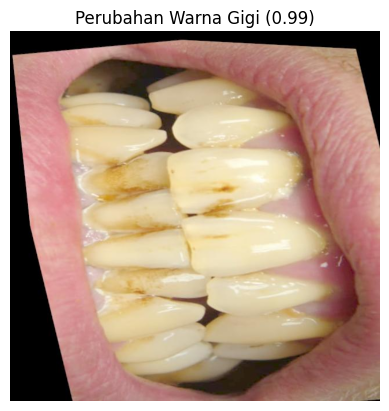

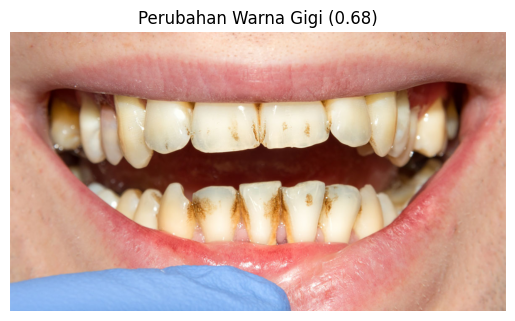

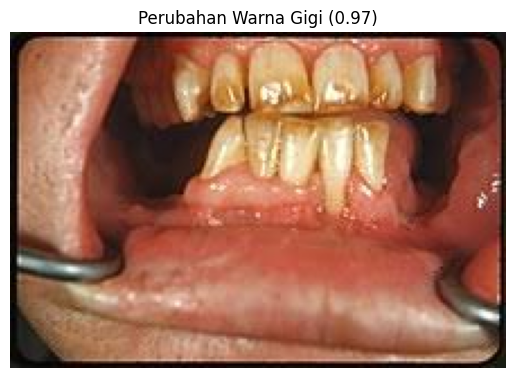

Accuracy: 0.98


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import onnxruntime as ort
from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMAGE_SIZE = 416

# Load the ONNX model
onnx_model_path = 'D:/MODELING ML/runs/classify/train31/weights/best.onnx'
onnx_session = ort.InferenceSession(onnx_model_path)

# Define class labels
class_labels = ['Bukan Gigi', 'Gigi Berlubang', 'Gigi Sehat', 'Perubahan Warna Gigi', 'Radang Gusi']
h = 'Gigi Berlubang'

# Path to the folder containing images
folder_path = 'D:/MODELING ML/YoloDatasetV3_TampakAtas/test/Gigi Berlubang'  # Update with the path to your folder

# Lists to store predicted labels and confidences
predicted_labels = []
confidences = []

# Iterate over all images in the folder
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)

    # Load and preprocess the image
    img = load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    x = img_to_array(img)
    x = np.transpose(x, (2, 0, 1))  # Change dimensions from (224, 224, 3) to (3, 224, 224)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Ensure that the image is scaled the same way as during training

    # Perform inference
    input_name = onnx_session.get_inputs()[0].name
    output_name = onnx_session.get_outputs()[0].name
    classes = onnx_session.run([output_name], {input_name: x.astype(np.float32)})[0]
    predicted_class_index = np.argmax(classes)

    # Get the predicted label and confidence
    if predicted_class_index < len(class_labels):
        predicted_label = class_labels[predicted_class_index]
        confidence = classes[0][predicted_class_index]
    else:
        predicted_label = h
        confidence = 0.0

    # Store predicted label and confidence
    predicted_labels.append(predicted_label)
    confidences.append(confidence)

    # Display the image and prediction if predicted label differs from h
    if predicted_label != h:
        plt.imshow(load_img(image_path))
        plt.axis('off')
        plt.title(f"{predicted_label} ({confidence:.2f})")
        plt.show()

# Calculate and print accuracy
total_predictions = len(predicted_labels)
if total_predictions > 0:
    correct_predictions = predicted_labels.count(h)
    accuracy = correct_predictions / total_predictions
    print(f"Accuracy: {accuracy:.2f}")
else:
    print("No images predicted found.")


This code snippet is iterating over all the images in a specified folder, loading and preprocessing each image, performing inference using an ONNX model, and then checking if the prediction is incorrect based on a predefined set of class labels.

In [12]:
# Load the ONNX model
onnx_model_path = 'model.onnx'
onnx_session = ort.InferenceSession(onnx_model_path)

# Define class labels
class_labels = ['Perubahan Warna Gigi', 'Radang Gusi', 'Gigi Berlubang', 'Gigi Sehat', 'Bukan Gigi']
h = 'Bukan Gigi'

# Path to the folder containing images
folder_path = 'D:/MODELING ML/YoloDatasetV3_TampakAtas/test/Bukan Gigi'  # Update with the path to your folder

# Lists to store misclassified image paths, predicted labels, and confidences
misclassified_images = []
misclassified_labels = []
misclassified_confidences = []

# Iterate over all images in the folder
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)

    # Load and preprocess the image
    img = load_img(image_path, target_size=IMAGE_SIZE)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Ensure that the image is scaled the same way as during training

    # Perform inference
    input_name = onnx_session.get_inputs()[0].name
    output_name = onnx_session.get_outputs()[0].name
    classes = onnx_session.run([output_name], {input_name: x.astype(np.float32)})[0]
    predicted_class_index = np.argmax(classes)

    # Get the predicted label and confidence
    if predicted_class_index < len(class_labels):
        predicted_label = class_labels[predicted_class_index]
        confidence = classes[0][predicted_class_index]
    else:
        predicted_label = h
        confidence = 0.0

    # Check if the prediction is incorrect
    if predicted_label != h:
        # Store misclassified image path, predicted label, and confidence
        misclassified_images.append(image_path)
        misclassified_labels.append(predicted_label)
        misclassified_confidences.append(confidence)

# Display misclassified images
for image_path, predicted_label, confidence in zip(misclassified_images, misclassified_labels, misclassified_confidences):
    # Display the image and prediction
    plt.imshow(load_img(image_path))
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label} (Confidence: {confidence:.2f})")
    plt.show()


NoSuchFile: [ONNXRuntimeError] : 3 : NO_SUCHFILE : Load model from model.onnx failed:Load model model.onnx failed. File doesn't exist